<h1>Лабораторна робота 2</h1>
<h3>Товстоноженко Михайло ФБ-31мп</h3>

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [2]:
dataset = "SaYoPillow.csv"

In [3]:
data = pd.read_csv(dataset)
data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [4]:
columns = {'sr':"snoring rate", 'rr':"respiration rate", 'bt':"body temperature", 
           'lm':"limb movement", 'bo':"blood oxygen", 'em':"eye movement", 'sh':"sleeping hours", 
           'hr':"heart rate", 'sl':"stress level"}
data.columns = columns.values()
data.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [5]:
sl = columns['sl']
X = data.drop(sl, axis=1)
y = data[sl]

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

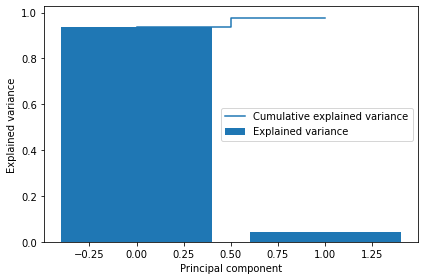

In [8]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [9]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

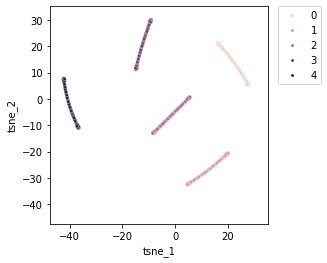

In [10]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

<h3>k-means</h3>

In [11]:
from sklearn.cluster import KMeans
from PIL import Image
from sklearn.utils import shuffle

In [12]:
img_path = "lana_rhoades.png"
image = Image.open(img_path)

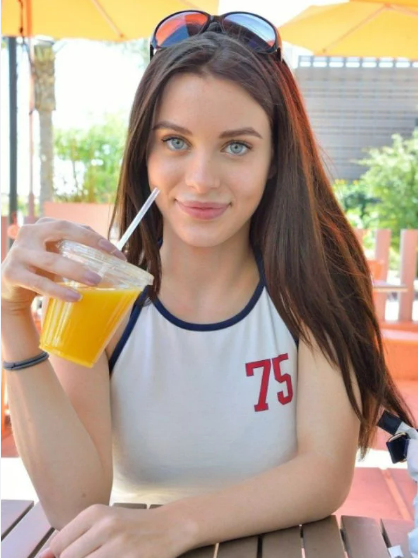

In [13]:
image

In [15]:
image_arr = np.array(image, dtype=np.float64) / 255

In [16]:
w, h, d = image_arr.shape
img_arr = np.reshape(image_arr, (w * h, d))
w, h, d

(558, 418, 4)

In [17]:
img_arr

array([[0.94509804, 0.95294118, 0.95686275, 1.        ],
       [0.96078431, 0.76470588, 0.54509804, 1.        ],
       [0.97647059, 0.78431373, 0.5372549 , 1.        ],
       ...,
       [0.78039216, 0.85490196, 0.94901961, 1.        ],
       [0.76470588, 0.85882353, 0.94901961, 1.        ],
       [0.76470588, 0.8627451 , 0.96470588, 1.        ]])

In [18]:
color_count = {64: None, 32: None, 16: None, 8: None}
for count in color_count:
    sample = shuffle(img_arr, n_samples=1000)
    kmeans = KMeans(n_clusters=count, n_init="auto")
    kmeans.fit(sample)
    color_count[count] = (kmeans.predict(img_arr), kmeans.cluster_centers_)

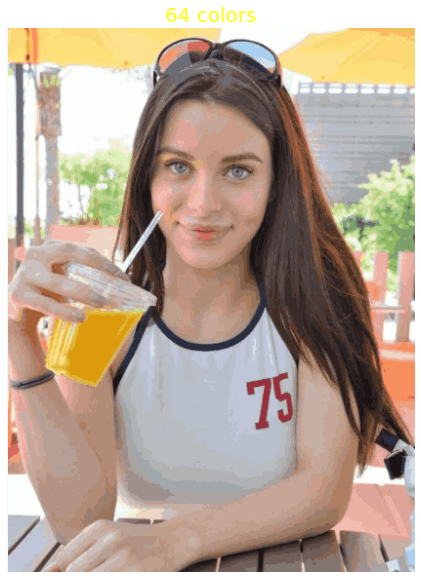

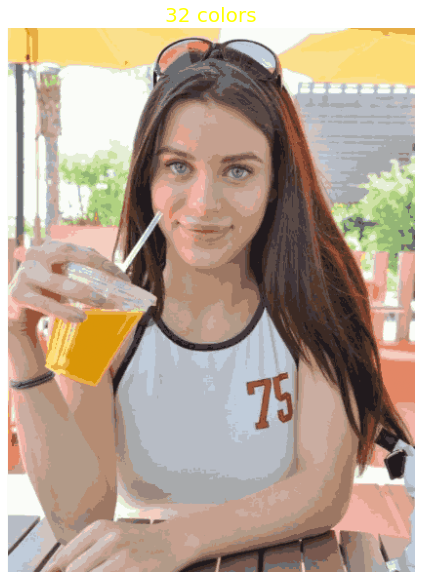

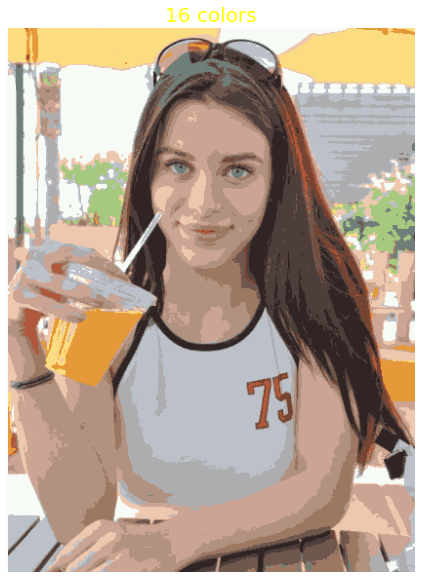

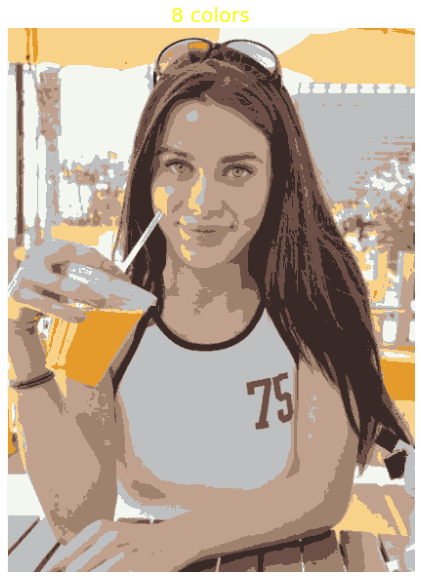

In [19]:
for labels, centers in color_count.values():
    img = np.zeros((w, h, d))
    ind = 0
    for i in range(w):
        for j in range(h):
            img[i][j] = centers[labels[ind]]
            ind += 1
    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.title(f"{len(centers)} colors", fontsize=20, color="yellow")
    plt.imshow(img)

<h3>Text</h3>

In [20]:
from nltk.corpus import stopwords
import nltk
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
text_dataset = "emails.csv"

In [22]:
text_data = pd.read_csv(text_dataset)

In [23]:
text_data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [24]:
stop_words = set(stopwords.words("english"))

In [25]:
def clean_text(text):
    text = text.lower()
    text = text[9:]
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    text = text.strip()
    return text

In [26]:
for ind, text in enumerate(text_data['text']):
    text = clean_text(text)
    text_data['text'][ind] = text

C:\Users\it02102021\AppData\Local\Temp\ipykernel_7616\3449085219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['text'][ind] = text


In [27]:
text_data['text']

0       naturally irresistible corporate identity lt r...
1       stock trading gunslinger fanny merrill muzo co...
2       unbelievable new homes made easy im wanting sh...
3       color printing special request additional info...
4       money get software cds software compatibility ...
                              ...                        
5723    research development charges gpg forwarded shi...
5724    receipts visit jim thanks invitation visit lsu...
5725    enron case study update wow day super thank mu...
5726    interest david please call shirley crenshaw as...
5727    news aurora update aurora version fastest mode...
Name: text, Length: 5728, dtype: object

In [28]:
def unite(label, txt):
    all_txt = " ".join([text for ind, text in enumerate(txt['text']) if txt['spam'][ind] == label])
    wordcloud = WordCloud(width=500, height=500, background_color="#373e4b").generate(all_txt)
    plt.figure(figsize=(10,10))
    plt.title("spam", fontsize=35, color="#ff0000") if label == 1 else plt.title("non-spam", fontsize=35, color="#00ff00")
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

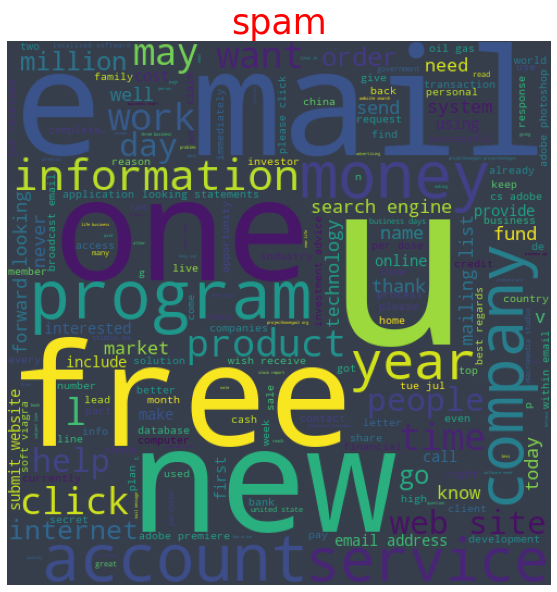

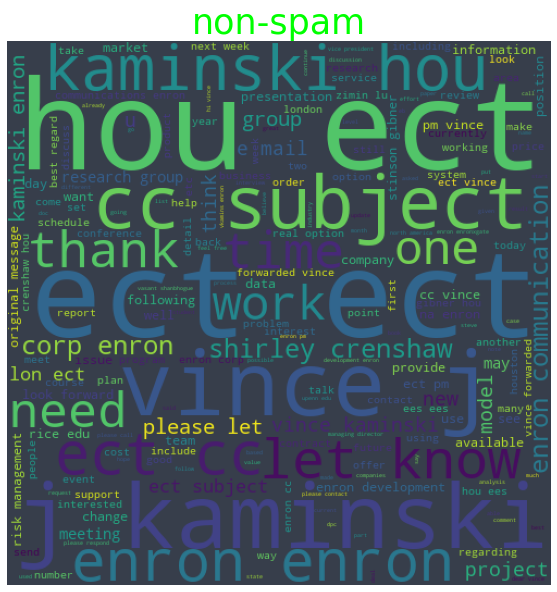

In [29]:
spam_text = unite(1, text_data)
non_spam_text = unite(0, text_data)

In [30]:
X = text_data['text']
y = text_data['spam']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
vectorizer = TfidfVectorizer()
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [33]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tf, y_train)
y_pred = clf.predict(X_test_tf)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1305
           1       1.00      0.95      0.97       414

    accuracy                           0.99      1719
   macro avg       0.99      0.97      0.98      1719
weighted avg       0.99      0.99      0.99      1719



In [35]:
print(confusion_matrix(y_test, y_pred))

[[1304    1]
 [  21  393]]
